Connected to env1 (Python 3.8.5)

In [4]:
import sys
import os
from tkinter import N
pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')
#############
#############
###imports###
#############

import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

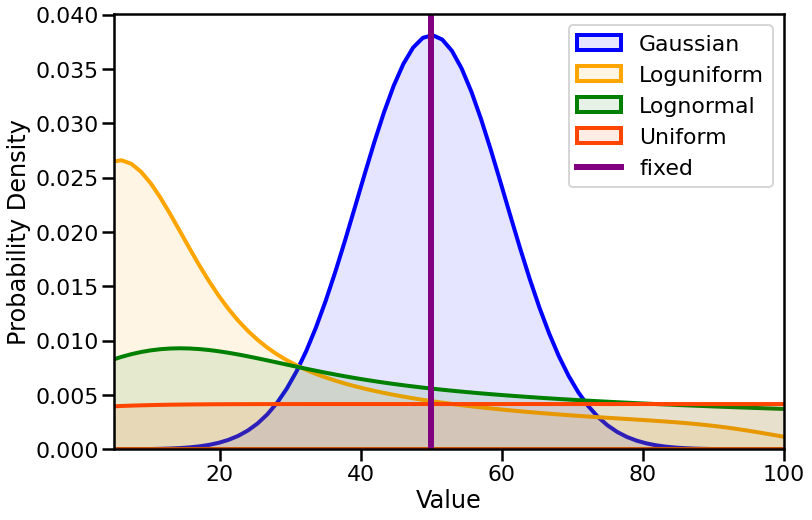

In [10]:
sns.set_context("poster")
# Adjusting the parameters as specified for the new plot
mu = 50  # Mean for Gaussian and Lognormal
sigma = 10  # Standard deviation for Gaussian and Lognormal (assumed)

# Generating points for x-axis
x_values = np.linspace(1, 200, 2000)
x_values_uniform = np.linspace(-20, 220, 2000)

# Gaussian PDF
mu = 50  # Mean for Gaussian and Lognormal
sigma = 10  # Standard deviation for Gaussian and Lognormal (assumed)
gaussian_pdf = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * ((x_values - mu) / sigma)**2)

# Lognormal PDF
mu = 50  # Mean for Gaussian and Lognormal
sigma = 10  # Standard deviation for Gaussian and Lognormal (assumed)
lognormal_pdf = (1 / (x_values * sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.log(x_values) - mu) / sigma)**2)

# Loguniform PDF
a, b = 1, 100  # Range for Loguniform
loguniform_pdf = 1 / (x_values * np.log(b / a))
loguniform_pdf[x_values < a] = 0
loguniform_pdf[x_values > b] = 0

# Uniform PDF (constant value across the range)\
uniform_pdf = 100

# Fixed PDF (single value at fixed_value)
fixed_value = 50  # Fixed value for Fixed distribution
fixed_pdf = np.zeros_like(x_values)
fixed_pdf[np.abs(x_values - fixed_value) < (x_values[1] - x_values[0])] = 1  # Spike at the fixed value

# Plotting the PDFs using seaborn
plt.figure(figsize=(12, 8))
sns.kdeplot(x=x_values, weights=gaussian_pdf, fill=True,alpha=0.1, color="blue", label="Gaussian",linewidth=4,  common_norm=False)
sns.kdeplot(x=x_values, weights=loguniform_pdf, fill=True, alpha=0.1,color="orange", label="Loguniform",linewidth=4,  common_norm=False)
sns.kdeplot(x=x_values, weights=lognormal_pdf, fill=True, alpha=0.1,color="green", label="Lognormal", linewidth=4, common_norm=False)
sns.kdeplot(x=x_values_uniform, weights=uniform_pdf, fill=True, alpha=0.1, color="orangered", label="Uniform", linewidth=4, common_norm=False)
plt.axvline(50, color='purple', label='fixed', linewidth = '6')# sns.kdeplot(x=x_values, weights=fixed_pdf, fill=True, color="purple", label="Fixed", common_norm=False)
# plt.title('PDFs of Loguniform, Gaussian, Lognormal, Uniform, and Fixed Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.xlim(5, 100)
plt.legend()
plt.savefig('pdfs.pdf')
plt.show()
